In [1]:
!pip install mysql-connector-python

In [40]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sb

In [26]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password='root',
    database='project')

data=pd.read_sql_query('select * from titanica',con)
data
data.head(15)

,PassengerId,Survived,Pclass,Town,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"""Braund","Mr. Owen Harris""",male,22,1,0,A/5 21171,7.25,,S
1,2,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"""Heikkinen","Miss. Laina""",female,26,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"""Allen","Mr. William Henry""",male,35,0,0,373450,8.05,,S
5,6,0,3,"""Moran","Mr. James""",male,,0,0,330877,8.4583,,Q
6,7,0,1,"""McCarthy","Mr. Timothy J""",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"""Palsson","Master. Gosta Leonard""",male,2,3,1,349909,21.075,,S
8,9,1,3,"""Johnson","Mrs. Oscar W (Elisabeth Vilhelmina Berg)""",female,27,0,2,347742,11.1333,,S
9,10,1,2,"""Nasser","Mrs. Nicholas (Adele Achem)""",female,14,1,0,237736,30.0708,,C



From common sense, columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability. So these columns can be droped. 

In [27]:
data.drop(["PassengerId",'Ticket','Cabin'],axis = 1,inplace = True)
data

,Survived,Pclass,Town,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"""Braund","Mr. Owen Harris""",male,22,1,0,7.25,S
1,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38,1,0,71.2833,C
2,1,3,"""Heikkinen","Miss. Laina""",female,26,0,0,7.925,S
3,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,53.1,S
4,0,3,"""Allen","Mr. William Henry""",male,35,0,0,8.05,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"""Montvila","Rev. Juozas""",male,27,0,0,13,S
887,1,1,"""Graham","Miss. Margaret Edith""",female,19,0,0,30,S
888,0,3,"""Johnston","Miss. Catherine Helen """"Carrie""""""",female,,1,2,23.45,S
889,1,1,"""Behr","Mr. Karl Howell""",male,26,0,0,30,C


In [28]:
data.dtypes

Survived    object
Pclass      object
Town        object
Name        object
Sex         object
Age         object
SibSp       object
Parch       object
Fare        object
Embarked    object
dtype: object

In [31]:
data['Survived']=data['Survived'].astype(int)
data['Pclass']=data['Pclass'].astype(int)
data['SibSp']=data['SibSp'].astype(int)
data['Parch']=data['Parch'].astype(int)
data['Fare']=data['Fare'].astype(float)

In [32]:
data.dtypes

Survived      int32
Pclass        int32
Town         object
Name         object
Sex          object
Age          object
SibSp         int32
Parch         int32
Fare        float64
Embarked     object
dtype: object

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int32  
 2   Town      891 non-null    object 
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       891 non-null    object 
 6   SibSp     891 non-null    int32  
 7   Parch     891 non-null    int32  
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(1), int32(4), object(5)
memory usage: 55.8+ KB


In [34]:
data.head()

,Survived,Pclass,Town,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"""Braund","Mr. Owen Harris""",male,22,1,0,7.2500,S
1,1,1,"""Cumings","Mrs. John Bradley (Florence Briggs Thayer)""",female,38,1,0,71.2833,C
2,1,3,"""Heikkinen","Miss. Laina""",female,26,0,0,7.9250,S
3,1,1,"""Futrelle","Mrs. Jacques Heath (Lily May Peel)""",female,35,1,0,53.1000,S
4,0,3,"""Allen","Mr. William Henry""",male,35,0,0,8.0500,S


In [35]:
data.isnull().sum()

Survived    0
Pclass      0
Town        0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Town        0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [43]:
data.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


38.3% people survived


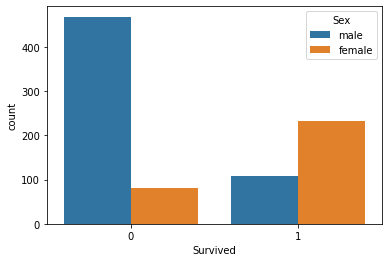

In [49]:
sb.countplot(x='Survived',hue='Sex',data=data)

Survived and sex of the dataset as shown above

In [45]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

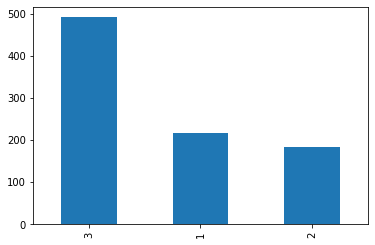

In [46]:
data['Pclass'].value_counts().plot.bar()

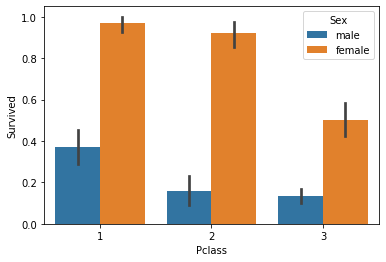

In [47]:
sb.barplot('Pclass','Survived',hue='Sex', data=data)

Pclass survival and sex as shown in above plot

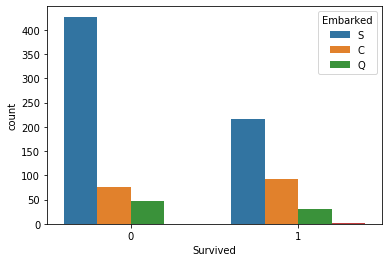

In [51]:
sb.countplot(x='Survived', hue = 'Embarked', data=data);

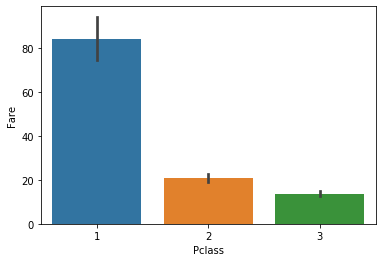

In [53]:
sb.barplot(y='Fare',x='Pclass',data=data)

In [52]:
data.corr()

,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


Finding the co-relation with each-other


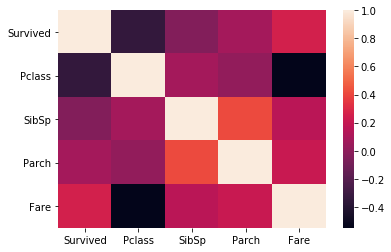

In [54]:
sb.heatmap(data.corr())

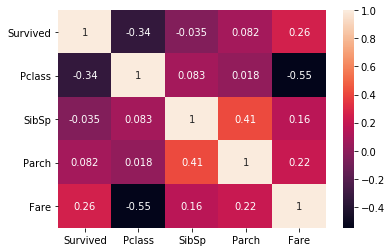

In [56]:
sb.heatmap(data.corr(),annot=True)

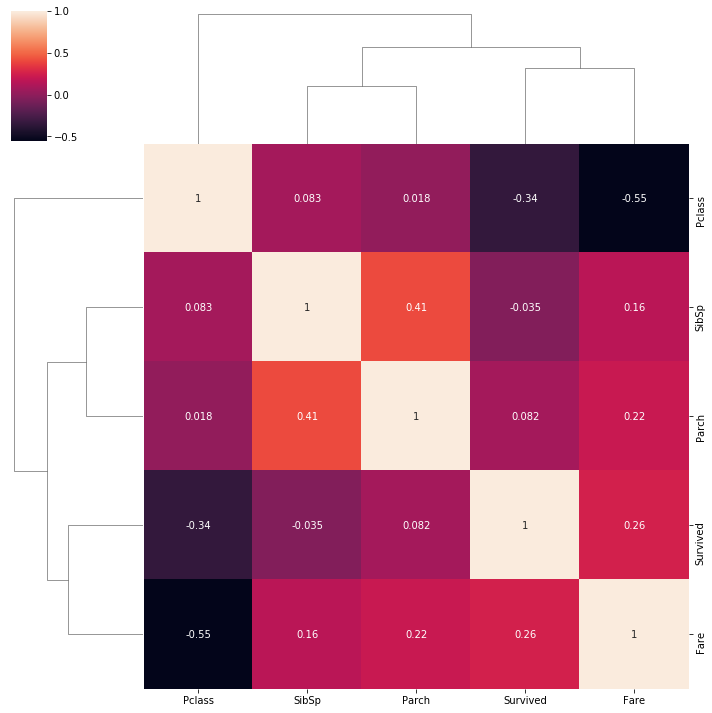

In [58]:
sb.clustermap(data.corr(),annot=True)

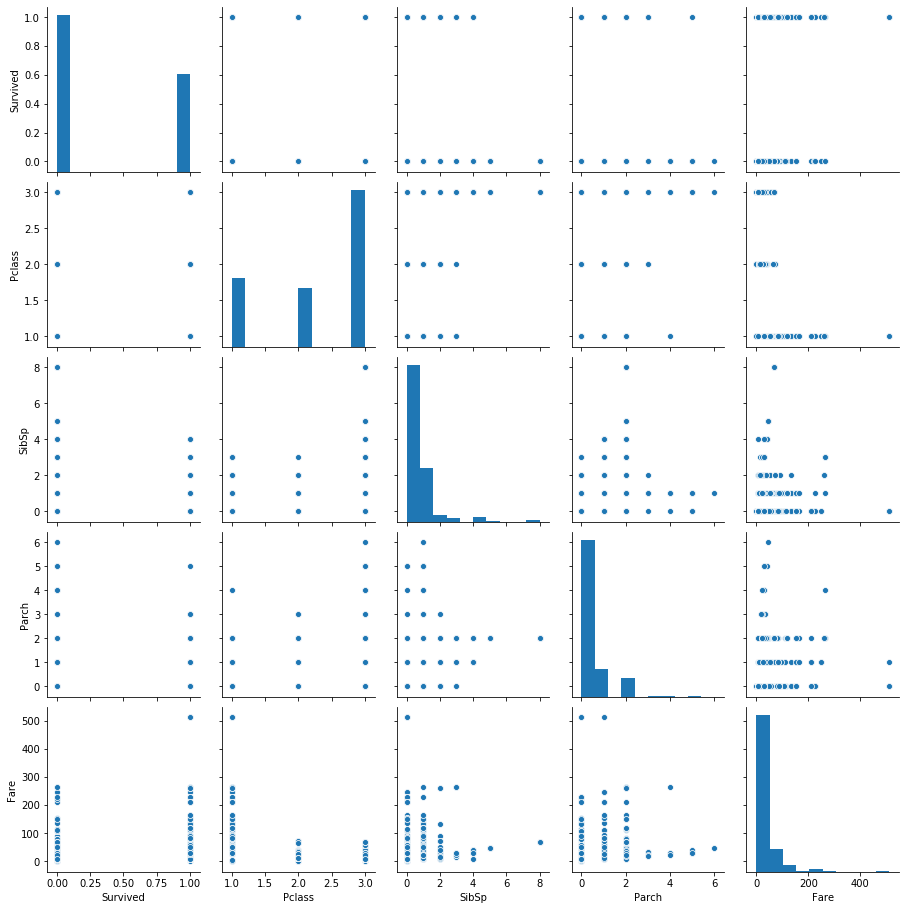

In [59]:
sb.pairplot(data)